In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle
import json
import random
import matplotlib.pyplot as plt
import networkx as nx
import random
import multiprocessing as mp
print('CPU numbers:',mp.cpu_count())
def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)
def apply_by_multiprocessing(df, func, **kwargs):
#     print(kwargs)
    workers = kwargs.pop('workers')
    pool = mp.Pool(processes=workers)
    result = pool.map(_apply_df, [(d, func, kwargs) for d in np.array_split(df, workers)])
    pool.close()
    return pd.concat(list(result))
#apply_by_multiprocessing(fullset['Text'], process_text, workers=cores)

df = pd.read_csv('./user_taggedmovies.dat',sep="\s+", )
df

userID  movieID  tagID  date_day  date_month  date_year  date_hour  \
0          75      353   5290        29          10       2006         23   
1          78     4223   5264        16           4       2007          4   
2         127     1343   1544        28           8       2007          3   
3         127     1343  12330        28           8       2007          3   
4         127     2080   1451        28           8       2007          3   
...       ...      ...    ...       ...         ...        ...        ...   
47952   71534     7937    306         3          12       2007          3   
47953   71534     8848    331         3          12       2007          3   
47954   71534     8848    427         3          12       2007          3   
47955   71534    25833   7671         3          12       2007          3   
47956   71534    30701    243         3          12       2007          3   

       date_minute  date_second  
0               20           15  
1               43           45  
2               42           27  
3               42           27  
4               42           47  
...            ...          ...  
47952            7           14  
47953            6           19  
47954            6           27  
47955            7           31  
47956            4           32  

[47957 rows x 9 columns]

In [3]:
df.iloc[:,:3]

userID  movieID  tagID
0          75      353   5290
1          78     4223   5264
2         127     1343   1544
3         127     1343  12330
4         127     2080   1451
...       ...      ...    ...
47952   71534     7937    306
47953   71534     8848    331
47954   71534     8848    427
47955   71534    25833   7671
47956   71534    30701    243

[47957 rows x 3 columns]

In [52]:
df.loc[:,'timestamps'] = df.date_year.astype('str')+'_'+ df.date_month.astype('str')+'_'+ df.date_day.astype('str')+'_'+ \
df.date_hour.astype('str')+'_'+df.date_minute.astype('str')+'_'+df.date_second.astype('str')

df.loc[:,'timestamps'] = df.loc[:,'timestamps'].apply(pd.to_datetime,format='%Y_%m_%d_%H_%M_%S')
df['dayofweek_num']=df['timestamps'].dt.dayofweek  
df['weekofyear']=df['timestamps'].dt.weekofyear
df['quarter']=df['timestamps'].dt.quarter
df['days_in_month']=df['timestamps'].dt.days_in_month
df['is_month_start']=df['timestamps'].dt.is_month_start
df['is_month_end']=df['timestamps'].dt.is_month_end
df['is_quarter_start']=df['timestamps'].dt.is_quarter_start
df['is_quarter_end']=df['timestamps'].dt.is_quarter_end
df['is_year_start']=df['timestamps'].dt.is_year_start
df['is_year_end']=df['timestamps'].dt.is_year_end
df['is_leap_year']=df['timestamps'].dt.is_leap_year

/tmp/ipykernel_835945/2200196596.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear']=df['timestamps'].dt.weekofyear


In [53]:
df

userID  movieID  tagID  date_day  date_month  date_year  date_hour  \
0          75      353   5290        29          10       2006         23   
1          78     4223   5264        16           4       2007          4   
2         127     1343   1544        28           8       2007          3   
3         127     1343  12330        28           8       2007          3   
4         127     2080   1451        28           8       2007          3   
...       ...      ...    ...       ...         ...        ...        ...   
47952   71534     7937    306         3          12       2007          3   
47953   71534     8848    331         3          12       2007          3   
47954   71534     8848    427         3          12       2007          3   
47955   71534    25833   7671         3          12       2007          3   
47956   71534    30701    243         3          12       2007          3   

       date_minute  date_second          timestamps  ...  weekofyear  quarter  \
0               20           15 2006-10-29 23:20:15  ...          43        4   
1               43           45 2007-04-16 04:43:45  ...          16        2   
2               42           27 2007-08-28 03:42:27  ...          35        3   
3               42           27 2007-08-28 03:42:27  ...          35        3   
4               42           47 2007-08-28 03:42:47  ...          35        3   
...            ...          ...                 ...  ...         ...      ...   
47952            7           14 2007-12-03 03:07:14  ...          49        4   
47953            6           19 2007-12-03 03:06:19  ...          49        4   
47954            6           27 2007-12-03 03:06:27  ...          49        4   
47955            7           31 2007-12-03 03:07:31  ...          49        4   
47956            4           32 2007-12-03 03:04:32  ...          49        4   

       days_in_month  is_month_start  is_month_end  is_quarter_start  \
0                 31           False         False             False   
1                 30           False         False             False   
2                 31           False         False             False   
3                 31           False         False             False   
4                 31           False         False             False   
...              ...             ...           ...               ...   
47952             31           False         False             False   
47953             31           False         False             False   
47954             31           False         False             False   
47955             31           False         False             False   
47956             31           False         False             False   

       is_quarter_end  is_year_start  is_year_end  is_leap_year  
0               False          False        False         False  
1               False          False        False         False  
2               False          False        False         False  
3               False          False        False         False  
4               False          False        False         False  
...               ...            ...          ...           ...  
47952           False          False        False         False  
47953           False          False        False         False  
47954           False          False        False         False  
47955           False          False        False         False  
47956           False          False        False         False  

[47957 rows x 21 columns]

In [22]:
df.filter(regex="[^time_stamp]").iloc[:,3:9].head()

date_day  date_month  date_year  date_hour  date_minute  date_second
0        29          10       2006         23           20           15
1        16           4       2007          4           43           45
2        28           8       2007          3           42           27
3        28           8       2007          3           42           27
4        28           8       2007          3           42           47

# PCA

## Original temporal data pca
only year, month, day, hour, min, second 

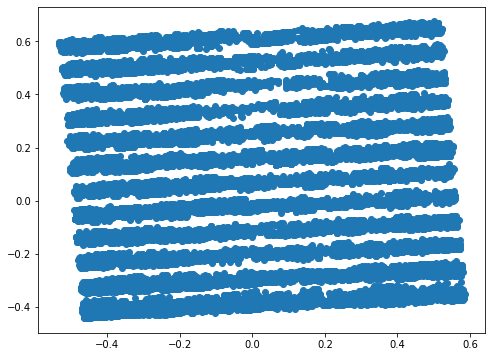

In [6]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,3:9]
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

## Manual Temporal features pca
only Manual temproal features (11 features)

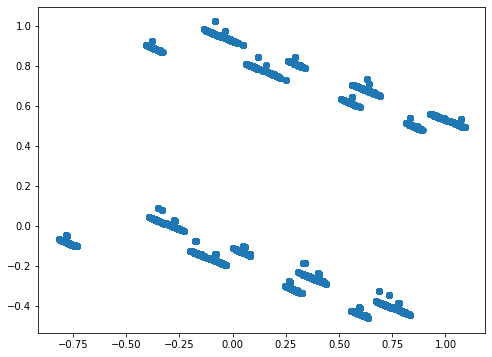

In [10]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,9:]
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

## All temporal data pca
(original temporal features + manual features)

In [90]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,3:]
cols = df_selected.columns
df_selected

date_day  date_month  date_year  date_hour  date_minute  date_second  \
0            29          10       2006         23           20           15   
1            16           4       2007          4           43           45   
2            28           8       2007          3           42           27   
3            28           8       2007          3           42           27   
4            28           8       2007          3           42           47   
...         ...         ...        ...        ...          ...          ...   
47952         3          12       2007          3            7           14   
47953         3          12       2007          3            6           19   
47954         3          12       2007          3            6           27   
47955         3          12       2007          3            7           31   
47956         3          12       2007          3            4           32   

       dayofweek_num  weekofyear  quarter  days_in_month  is_month_start  \
0                  6          43        4             31           False   
1                  0          16        2             30           False   
2                  1          35        3             31           False   
3                  1          35        3             31           False   
4                  1          35        3             31           False   
...              ...         ...      ...            ...             ...   
47952              0          49        4             31           False   
47953              0          49        4             31           False   
47954              0          49        4             31           False   
47955              0          49        4             31           False   
47956              0          49        4             31           False   

       is_month_end  is_quarter_start  is_quarter_end  is_year_start  \
0             False             False           False          False   
1             False             False           False          False   
2             False             False           False          False   
3             False             False           False          False   
4             False             False           False          False   
...             ...               ...             ...            ...   
47952         False             False           False          False   
47953         False             False           False          False   
47954         False             False           False          False   
47955         False             False           False          False   
47956         False             False           False          False   

       is_year_end  is_leap_year  
0            False         False  
1            False         False  
2            False         False  
3            False         False  
4            False         False  
...            ...           ...  
47952        False         False  
47953        False         False  
47954        False         False  
47955        False         False  
47956        False         False  

[47957 rows x 17 columns]

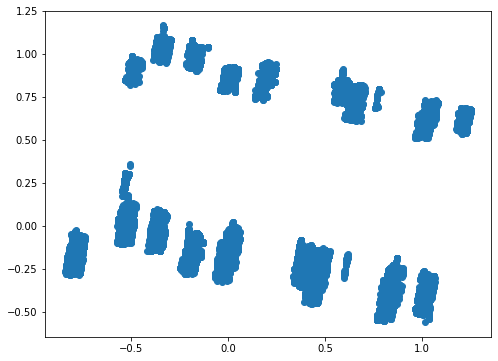

In [91]:
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
# scaler.inverse_transform(df_selected)
pca = PCA()
vectors = pca.fit_transform(df_selected)#高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1]) # user

### PCA result analysis

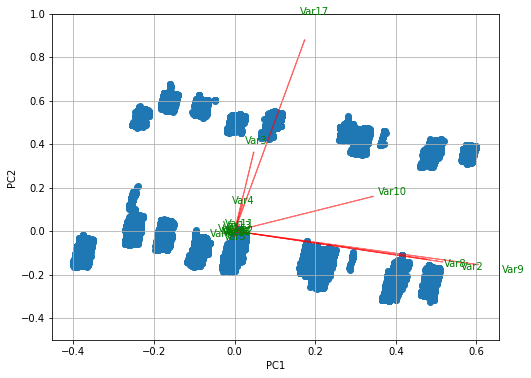

In [92]:
# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley) # c = y 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
# plt.xlim(-1,1)
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(vectors[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [93]:
pca.explained_variance_ratio_.shape

(17,)

In [94]:
pca.components_.shape

(17, 17)

In [95]:
# get the most important features on the PCs 
n_pcs= pca.components_.shape[0] # 2

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = cols
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_pca = pd.DataFrame(dic.items())
df_pca.T

0             1          2              3              4   \
0      PC0           PC1        PC2            PC3            PC4   
1  quarter  is_leap_year  date_hour  dayofweek_num  days_in_month   

            5            6         7               8             9   \
0          PC5          PC6       PC7             PC8           PC9   
1  date_minute  date_second  date_day  is_month_start  is_month_end   

          10                11              12       13             14  \
0       PC10              PC11            PC12     PC13           PC14   
1  date_year  is_quarter_start  is_quarter_end  quarter  is_year_start   

               15           16  
0            PC15         PC16  
1  is_quarter_end  is_year_end

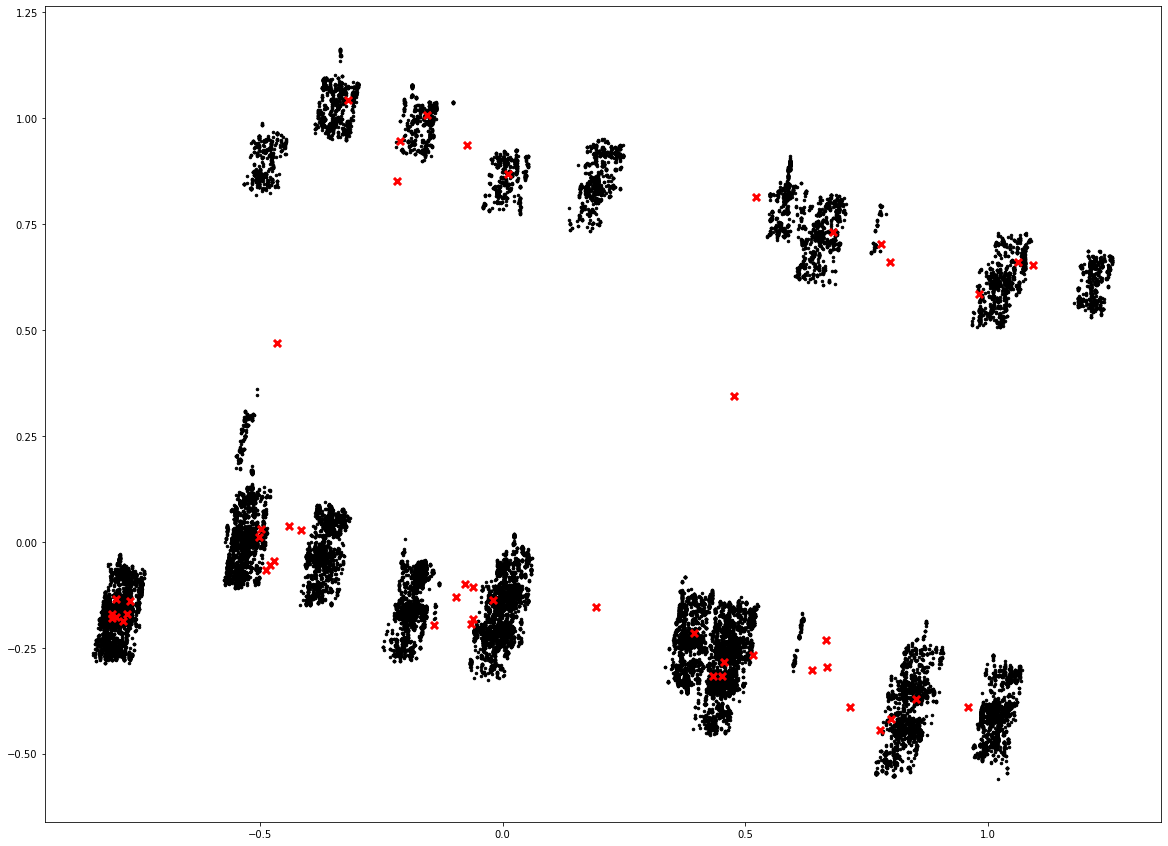

In [96]:
CLUSTERS = 50
estimator = KMeans(n_clusters=CLUSTERS,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (20, 15)

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
# plt.title('K-means clustering on the TSFresh Features (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.show()


## tagging behaviour vote
top 3

In [97]:
df_tagging = pd.concat([df.iloc[:,:3],pd.Series(label_pred)], axis=1)
df_tagging = df_tagging.rename(columns={0:'cluster'})

In [98]:
# user center
df_userC = df_tagging.groupby(['userID','cluster'])[['movieID']].count()
df_userC = df_userC.rename(columns={'movieID':'count'})
df_userC = df_userC.reset_index().sort_values(by=['userID','count'], ascending=[True,False])

In [99]:
df_userC[df_userC.userID==71509] # count is the frequency of cluster apearing in a user's tagging behaviour

userID  cluster  count
5314   71509       46    109
5311   71509       22     13
5313   71509       36      3
5312   71509       34      2
5310   71509       21      1

In [100]:
df_userC_Top = pd.DataFrame(df_userC.groupby('userID').apply(lambda x: x['cluster'][:3])).reset_index() # MAX 3 clusters orig 3743-> 2933 (Top3)
del df_userC_Top['level_1']
df_userC_Top

userID  cluster
0         75       44
1         78       19
2        127       47
3        127        2
4        170       21
...      ...      ...
3434   71509       36
3435   71525       42
3436   71529       43
3437   71529       44
3438   71534       10

[3439 rows x 2 columns]

In [101]:
# iI item cluster- item
df_itemC = df_tagging.groupby(['movieID','cluster'])[['userID']].count()
df_itemC = df_itemC.rename(columns={'userID':'count'})
df_itemC = df_itemC.reset_index().sort_values(by=['movieID','count'], ascending=[True,False])
df_itemC_Top = pd.DataFrame(df_itemC.groupby('movieID').apply(lambda x: x['cluster'][:3])).reset_index() # (Top3)
del df_itemC_Top['level_1']
df_itemC_Top

movieID  cluster
0            1       18
1            1       28
2            1       30
3            2        6
4            2       20
...        ...      ...
12968    64993       25
12969    65006       23
12970    65037       27
12971    65126       37
12972    65130        7

[12973 rows x 2 columns]

In [102]:
# tT tag cluster- Tag
df_tagC = df_tagging.groupby(['tagID','cluster'])[['userID']].count()
df_tagC = df_tagC.rename(columns={'userID':'count'})
df_tagC = df_tagC.reset_index().sort_values(by=['tagID','count'], ascending=[True,False])
df_tagC_Top = pd.DataFrame(df_tagC.groupby('tagID').apply(lambda x: x['cluster'][:3])).reset_index() # (Top3)
del df_tagC_Top['level_1']
df_tagC_Top

tagID  cluster
0          1       36
1          2       13
2          2       19
3          2       40
4          3        4
...      ...      ...
14777  16521       11
14778  16522       32
14779  16527        1
14780  16528       37
14781  16529       37

[14782 rows x 2 columns]

In [103]:
res_output = {'cU':{},'cI':{},'cT':{}}
for i,v in df_userC_Top.groupby('cluster').apply(lambda x: list([f'U-{i}' for i in x['userID']])).items():
  res_output['cU'][f'c-{i}'] = v

for i,v in df_itemC_Top.groupby('cluster').apply(lambda x: list([f'I-{i}' for i in x['movieID']])).items():
  res_output['cI'][f'c-{i}'] = v

for i,v in df_tagC_Top.groupby('cluster').apply(lambda x: list([f'T-{i}' for i in x['tagID']])).items():
  res_output['cT'][f'c-{i}'] = v

In [105]:
res_output = {'Uc':{},'Ic':{},'Tc':{}}
for i,v in df_userC_Top.groupby('userID').apply(lambda x: list([f'c-{i}' for i in x['cluster']])).items():
  res_output['Uc'][f'U-{i}'] = v

for i,v in df_itemC_Top.groupby('movieID').apply(lambda x: list([f'c-{i}' for i in x['cluster']])).items():
  res_output['Ic'][f'I-{i}'] = v

for i,v in df_tagC_Top.groupby('tagID').apply(lambda x: list([f'c-{i}' for i in x['cluster']])).items():
  res_output['Tc'][f'T-{i}'] = v

In [106]:
jsonString = json.dumps(res_output)
# jsonFile = open(f"output/taggingKmeans{CLUSTERS}Vote_cU_cI_cT_Top3.json", "w")
jsonFile = open(f"output/taggingKmeans{CLUSTERS}Vote_Uc_Ic_Tc_Top3.json", "w")

jsonFile.write(jsonString)
jsonFile.close()

In [161]:
def saveJson(res_output, file):
    jsonString = json.dumps(res_output)
    jsonFile = open(f"output/{file}", "w")
    jsonFile.write(jsonString)
    jsonFile.close()

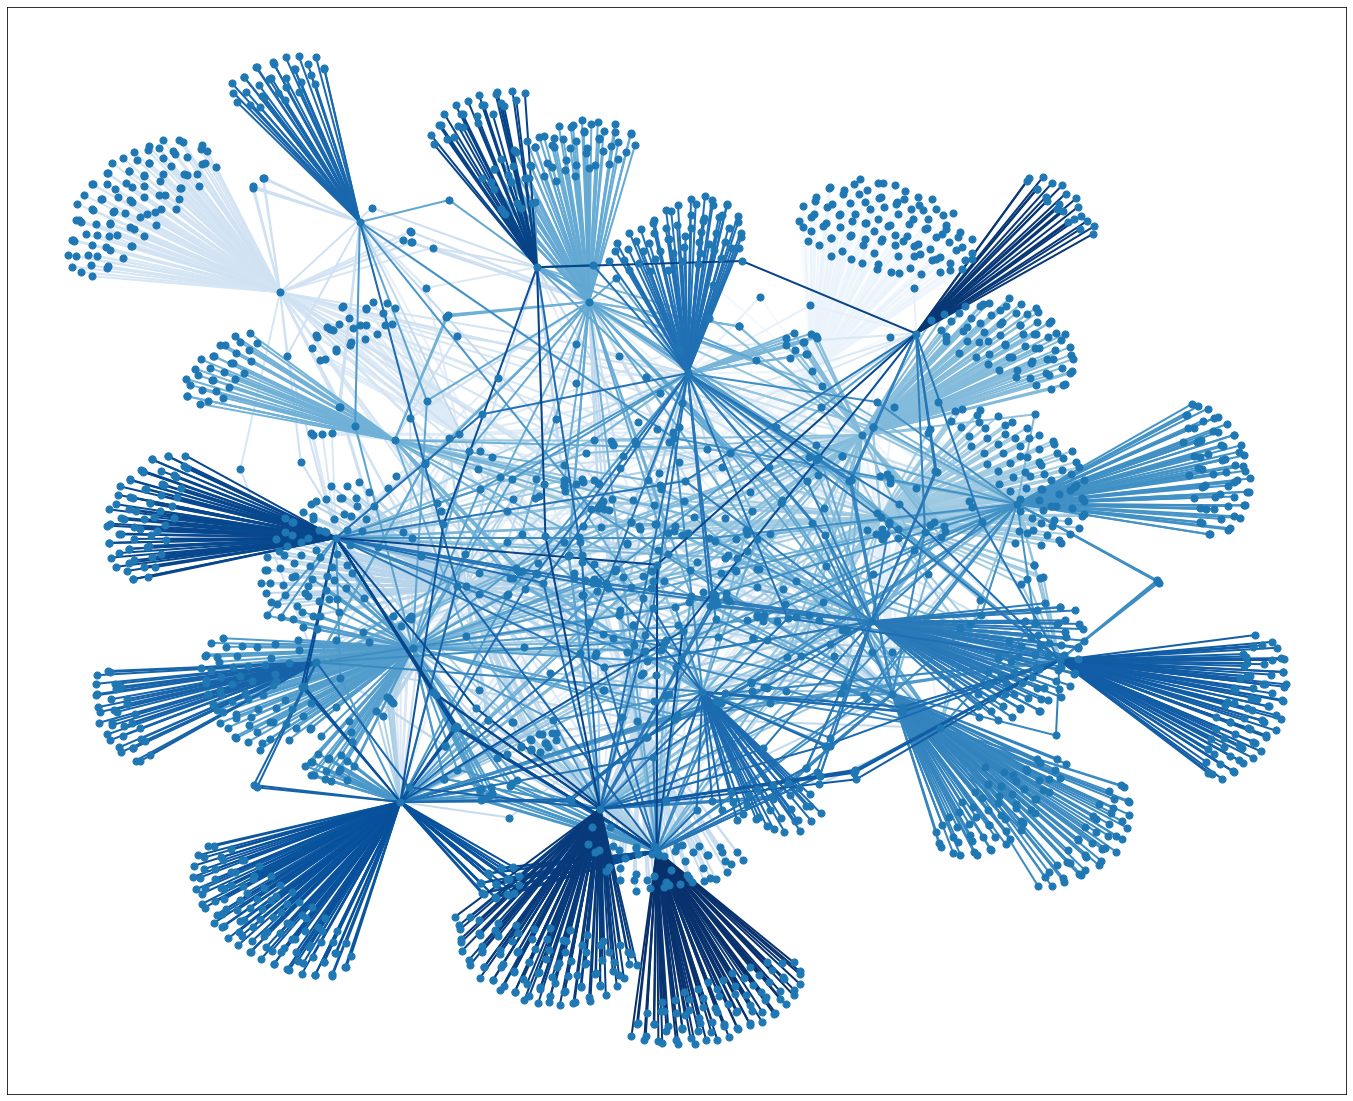

2933


In [ ]:
# tagging behaviour center - user
random.seed(0)        
np.random.seed(0)
G = nx.Graph()

for c in res_output['cU']:
    for u in res_output['cU'][c]:
        G.add_edge(c, u)

plt.rcParams["figure.figsize"] = (24, 20)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos,node_size=50)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
# labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

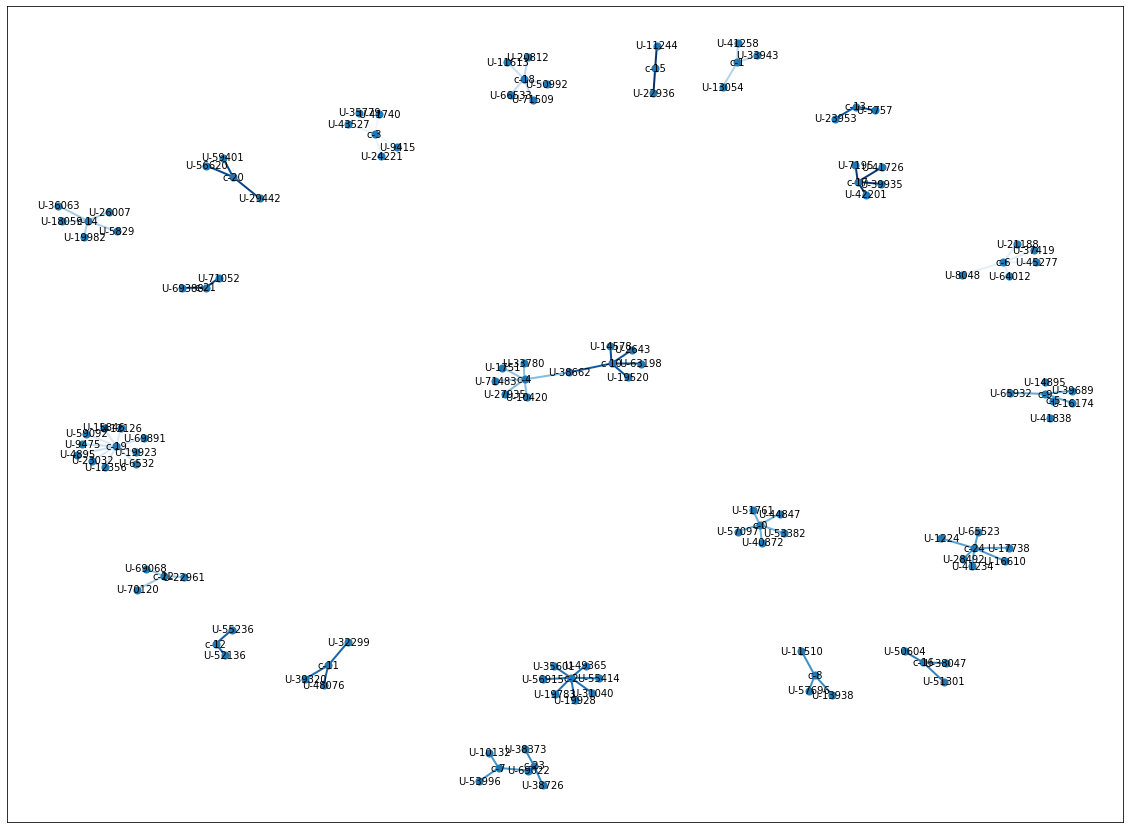

100


In [ ]:
# only show random 100 tagging center -user
random.seed(0)        
np.random.seed(0)
G = nx.Graph()
df_userC_1k = df_userC.sample(100, random_state=0)
for i in range(len(df_userC_1k)):
    G.add_edge(f'U-{df_userC_1k.iloc[i,0]}', f'c-{df_userC_1k.iloc[i,1]}', weights= df_userC_1k.iloc[i,2])

plt.rcParams["figure.figsize"] = (20, 15)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos,  node_size=50)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=10)
plt.show()
print(M)

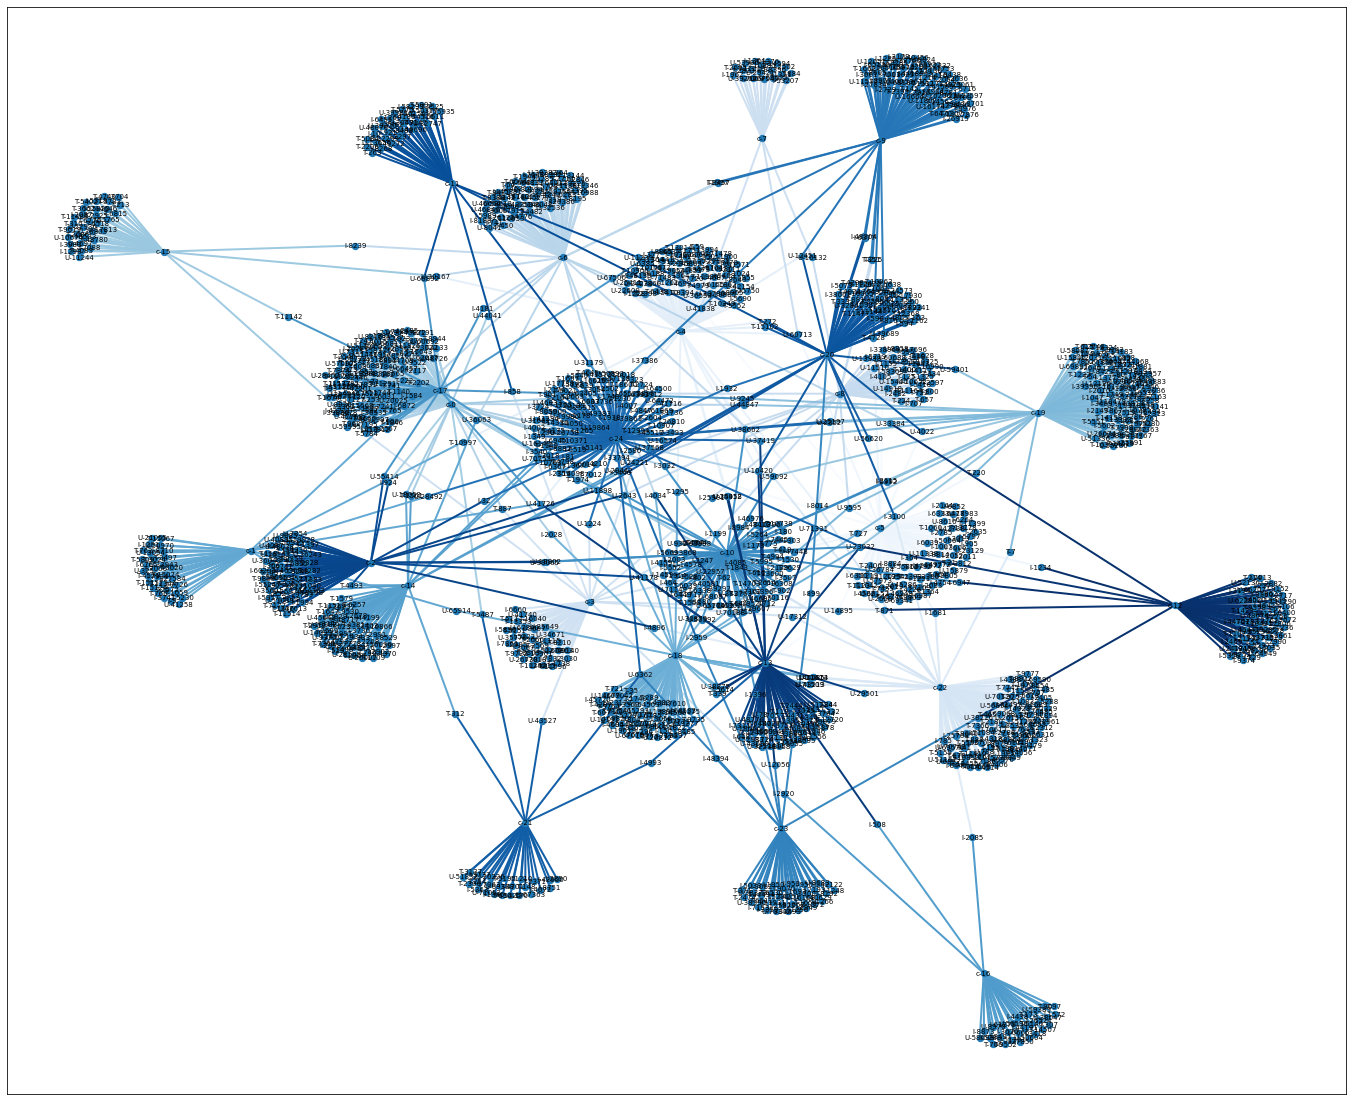

1500


In [ ]:
# tagging behaviour centers - user / item / tag
random.seed(0)        
np.random.seed(0)
G = nx.Graph()

k = 500
df_userC_1k = df_userC.sample(k, random_state=0)
df_itemC_1k = df_itemC.sample(k, random_state=0)
df_tagC_1k = df_tagC.sample(k, random_state=0)
for i in range(k):
    G.add_edge(f'U-{df_userC_1k.iloc[i,0]}', f'c-{df_userC_1k.iloc[i,1]}', weights= df_userC_1k.iloc[i,2])
    G.add_edge(f'I-{df_itemC_1k.iloc[i,0]}', f'c-{df_itemC_1k.iloc[i,1]}', weights= df_userC_1k.iloc[i,2])
    G.add_edge(f'T-{df_tagC_1k.iloc[i,0]}', f'c-{df_tagC_1k.iloc[i,1]}', weights= df_userC_1k.iloc[i,2])

plt.rcParams["figure.figsize"] = (24, 20)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos,  node_size=40, )
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=7)
plt.show()
print(M)

### Group by User
All temporal no tagging realation(U/M/T)

在mean agg之前 scale 防止异常值影响, 如果先mean 在scale?

In [294]:
df_selected = df.filter(regex="[^time_stamp]").iloc[:,3:] # all temporal data
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
df_selected = pd.DataFrame(df_selected)
df_selected.columns = df.filter(regex="[^time_stamp]").iloc[:,3:].columns
df_selected = pd.concat([df.iloc[:,:3],df_selected], axis=1)

In [295]:
df_selected.groupby('userID').mean()

movieID        tagID  date_day  date_month  date_year  date_hour  \
userID                                                                          
75        353.000000  5290.000000  0.933333    0.818182   0.250000   1.000000   
78       4223.000000  5264.000000  0.500000    0.272727   0.500000   0.173913   
127      5335.434783  4297.000000  0.900000    0.636364   0.500000   0.130435   
170     47830.000000    93.000000  0.966667    0.818182   0.250000   0.521739   
175     27179.500000  5743.000000  0.816667    0.727273   0.500000   0.521739   
...              ...          ...       ...         ...        ...        ...   
71497   11337.048780  4003.512195  0.901626    0.638581   0.500000   0.832450   
71509   13559.109375  9686.195312  0.021354    0.570313   0.740234   0.917120   
71525   45447.000000  5153.000000  0.333333    0.454545   0.250000   0.608696   
71529    3786.500000  2810.000000  0.933333    0.818182   0.250000   0.260870   
71534    3915.783784  2350.945946  0.066667    1.000000   0.500000   0.097532   

        date_minute  date_second  dayofweek_num  weekofyear   quarter  \
userID                                                                  
75         0.338983     0.254237       1.000000    0.823529  1.000000   
78         0.728814     0.762712       0.000000    0.294118  0.333333   
127        0.736920     0.598379       0.166667    0.666667  0.666667   
170        0.881356     0.949153       0.000000    0.843137  1.000000   
175        0.381356     0.449153       0.750000    0.735294  0.833333   
...             ...          ...            ...         ...       ...   
71497      0.584539     0.502274       0.186992    0.668580  0.666667   
71509      0.571901     0.470869       0.205729    0.534467  0.671875   
71525      0.915254     0.322034       1.000000    0.431373  0.333333   
71529      0.203390     0.533898       1.000000    0.823529  1.000000   
71534      0.639487     0.472744       0.000000    0.941176  1.000000   

        days_in_month  is_month_start  is_month_end  is_quarter_start  \
userID                                                                  
75           1.000000        0.000000       0.00000          0.000000   
78           0.666667        0.000000       0.00000          0.000000   
127          1.000000        0.000000       0.00000          0.000000   
170          1.000000        0.000000       0.00000          0.000000   
175          1.000000        0.000000       0.00000          0.000000   
...               ...             ...           ...               ...   
71497        0.991870        0.000000       0.02439          0.000000   
71509        0.963542        0.851562       0.00000          0.851562   
71525        0.666667        0.000000       0.00000          0.000000   
71529        1.000000        0.000000       0.00000          0.000000   
71534        1.000000        0.000000       0.00000          0.000000   

        is_quarter_end  is_year_start  is_year_end  is_leap_year  
userID                                                            
75             0.00000            0.0          0.0      0.000000  
78             0.00000            0.0          0.0      0.000000  
127            0.00000            0.0          0.0      0.000000  
170            0.00000            0.0          0.0      0.000000  
175            0.00000            0.0          0.0      0.000000  
...                ...            ...          ...           ...  
71497          0.02439            0.0          0.0      0.000000  
71509          0.00000            0.0          0.0      0.976562  
71525          0.00000            0.0          0.0      0.000000  
71529          0.00000            0.0          0.0      0.000000  
71534          0.00000            0.0          0.0      0.000000  

[2113 rows x 19 columns]

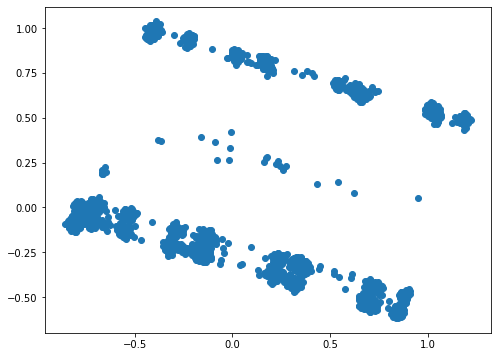

In [296]:
df_user = df_selected.groupby('userID').median().iloc[:,2:]  
# df_user = df_selected.groupby('userID').mean().iloc[:,2:]# mean
cols = df_user.columns
pca = PCA()
vectors = pca.fit_transform(df_user) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

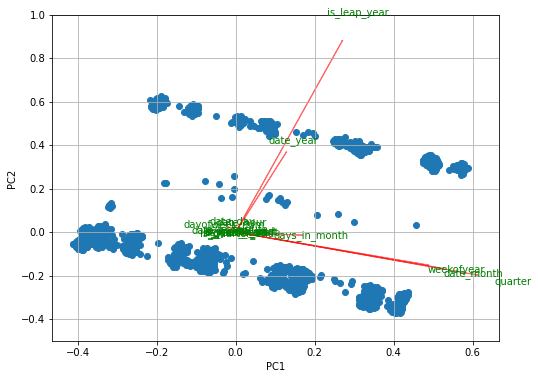

0             1              2          3              4   \
0      PC0           PC1            PC2        PC3            PC4   
1  quarter  is_leap_year  dayofweek_num  date_hour  days_in_month   

              5            6            7             8               9   \
0            PC5          PC6          PC7           PC8             PC9   
1  days_in_month  date_minute  date_second  is_month_end  is_month_start   

          10              11                12       13          14  \
0       PC10            PC11              PC12     PC13        PC14   
1  date_year  is_quarter_end  is_quarter_start  quarter  date_month   

            15             16  
0         PC15           PC16  
1  is_year_end  is_year_start

In [277]:
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(vectors[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

getdf_pca()

In [299]:
pd.Series(label_pred).value_counts()

21    92
2     89
17    77
36    73
20    72
29    67
24    66
22    65
8     63
14    63
49    61
5     58
33    54
3     54
9     53
40    52
18    50
42    49
6     48
23    45
39    43
47    43
26    42
7     42
37    40
1     39
11    38
25    38
34    37
27    36
12    36
30    35
31    35
15    34
46    33
16    30
0     30
10    29
45    28
19    27
44    27
4     25
35    20
38    19
48    17
32    11
41    11
28     8
13     6
43     3
dtype: int64

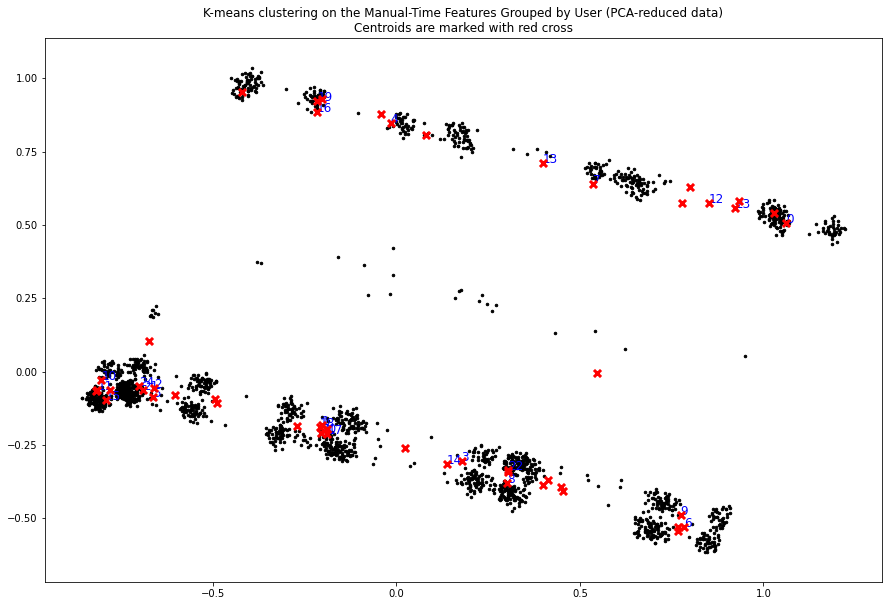

In [297]:
CLUSTERS = 50
estimator = KMeans(n_clusters=CLUSTERS,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (15, 10)


plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
plt.title('K-means clustering on the Manual-Time Features Grouped by User (PCA-reduced data)\n'
          'Centroids are marked with red cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [298]:
df_user['cluster'] = label_pred
# df_user

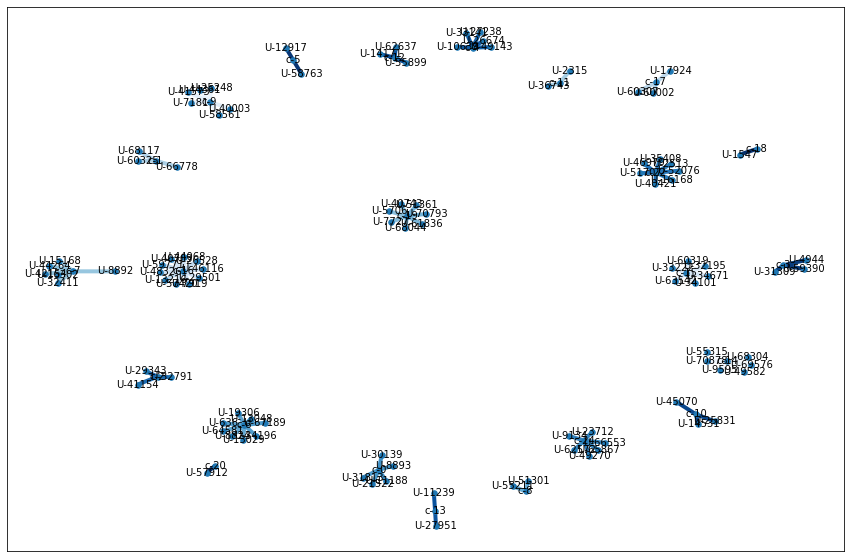

100


In [158]:
# user center - user
random.seed(0)        
np.random.seed(0)
G = nx.Graph()

for k,v in df_user.iloc[:,-1].sample(100, random_state=0).items():
    G.add_edge(f'U-{k}', f'c-{v}')

plt.rcParams["figure.figsize"] = (15, 10)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos,  node_size=30 )
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=4)
labels = nx.draw_networkx_labels(G,pos, font_size=10)
plt.show()
print(M)

In [300]:
res_output = {'uU':{},'iI':{},'tT':{}}

for i,v in df_user.groupby('cluster').apply(lambda x: list([f'U-{i}' for i in x.index])).items():
  res_output['uU'][f'u-{i}'] = v

In [301]:
res_output_1 = {'Uu':{},'Ii':{},'Tt':{}}

for i in df_user.index:
    res_output_1['Uu'][f'U-{i}'] = [f"u-{df_user.loc[i,'cluster']}"]

### Group by Item

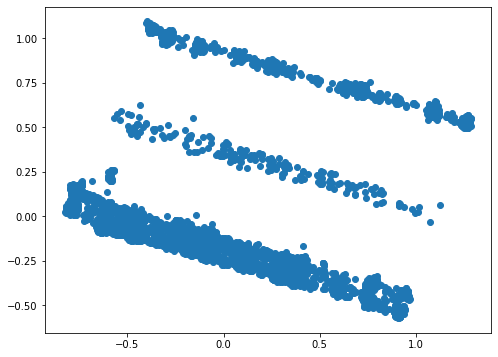

In [302]:
# df_movie = df_selected.groupby('movieID').mean().iloc[:,2:] # mean 
df_movie = df_selected.groupby('movieID').median().iloc[:,2:] # mean 

pca = PCA()
vectors = pca.fit_transform(df_movie) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

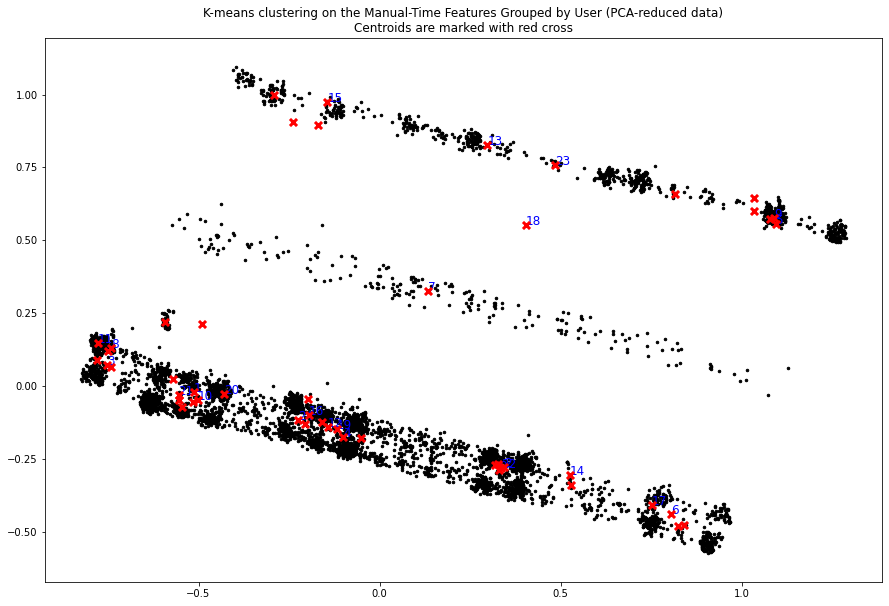

In [303]:
estimator = KMeans(n_clusters=CLUSTERS,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (15, 10)


plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
plt.title('K-means clustering on the Manual-Time Features Grouped by User (PCA-reduced data)\n'
          'Centroids are marked with red cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [304]:
df_movie['cluster'] = label_pred

In [305]:
for i,v in df_movie.groupby('cluster').apply(lambda x: list([f'I-{n}' for n in x.index])).items():
  res_output['iI'][f'i-{i}'] = v

In [306]:
for i in df_movie.index:
    res_output_1['Ii'][f'I-{i}'] = [f"i-{df_movie.loc[i,'cluster']}"]

### Group by Tag

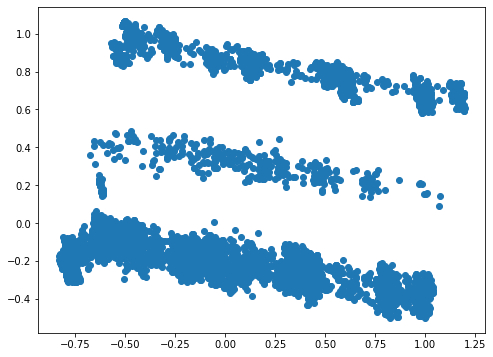

In [307]:
# df_tag = df_selected.groupby('tagID').mean().iloc[:,2:] # mean 
df_tag = df_selected.groupby('tagID').median().iloc[:,2:] 

pca = PCA()
vectors = pca.fit_transform(df_tag) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

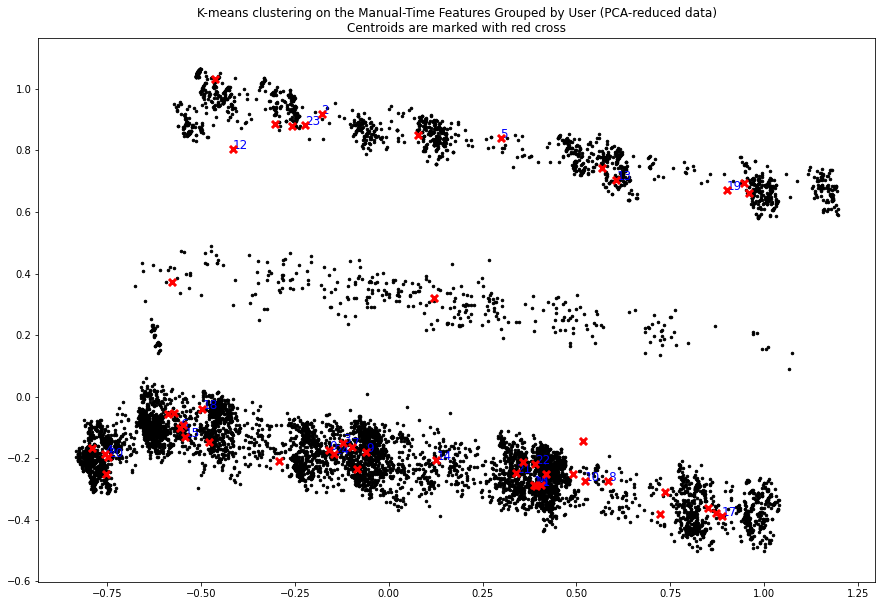

In [308]:
estimator = KMeans(n_clusters=CLUSTERS,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (15, 10)


plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
plt.title('K-means clustering on the Manual-Time Features Grouped by User (PCA-reduced data)\n'
          'Centroids are marked with red cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [309]:
df_tag['cluster'] = label_pred

In [310]:
for i,v in df_tag.groupby('cluster').apply(lambda x: list([f'T-{i}' for i in x.index])).items():
  res_output['tT'][f't-{i}'] = v

In [311]:
for i in df_tag.index:
    res_output_1['Tt'][f'T-{i}'] = [f"t-{df_tag.loc[i,'cluster']}"]

In [312]:
CLUSTERS

50

In [313]:
saveJson(res_output, f'taggingKMeans{CLUSTERS}MedianAgg_uU_iI_tT_Top1.json')    
saveJson(res_output_1, f'taggingKMeans{CLUSTERS}MedianAgg_Uu_Ii_Tt_Top1.json')

In [ ]:
# 分段mean再median
# All data mean/median agg

## Automated (TSFresh) Features
Tsfresh features for user and movie

In [221]:
with open('./extracted_features_times.pickle', 'rb') as handle:
    extracted_features = pickle.load(handle)

with open('./extracted_features_movie_times.pickle', 'rb') as handle:
    extracted_features_movie = pickle.load(handle)

In [262]:
extracted_features.shape,extracted_features_movie.shape

((984, 4722), (5798, 4722))

In [314]:
extracted_features

date_day__variance_larger_than_standard_deviation  \
127                                                  0.0   
190                                                  1.0   
325                                                  1.0   
383                                                  0.0   
477                                                  0.0   
...                                                  ...   
71420                                                1.0   
71478                                                1.0   
71497                                                0.0   
71509                                                1.0   
71534                                                0.0   

       date_day__has_duplicate_max  date_day__has_duplicate_min  \
127                            1.0                          1.0   
190                            1.0                          1.0   
325                            0.0                          1.0   
383                            1.0                          0.0   
477                            1.0                          1.0   
...                            ...                          ...   
71420                          1.0                          0.0   
71478                          0.0                          0.0   
71497                          1.0                          1.0   
71509                          0.0                          1.0   
71534                          1.0                          1.0   

       date_day__has_duplicate  date_day__sum_values  date_day__abs_energy  \
127                        1.0                 616.0               17248.0   
190                        1.0                 632.0               17162.0   
325                        1.0                  14.0                 124.0   
383                        1.0                  74.0                1826.0   
477                        1.0                 700.0               19600.0   
...                        ...                   ...                   ...   
71420                      1.0                1522.0               42600.0   
71478                      0.0                  20.0                 208.0   
71497                      1.0                1120.0               31360.0   
71509                      1.0                 206.0                1024.0   
71534                      1.0                 108.0                 324.0   

       date_day__mean_abs_change  date_day__mean_change  \
127                     0.000000               0.000000   
190                     1.208333               0.041667   
325                     3.333333              -3.333333   
383                     0.500000              -0.500000   
477                     0.000000               0.000000   
...                          ...                    ...   
71420                   0.444444              -0.407407   
71478                   4.000000               4.000000   
71497                   0.000000               0.000000   
71509                   0.293651              -0.055556   
71534                   0.000000               0.000000   

       date_day__mean_second_derivative_central  date_day__median  ...  \
127                                    0.000000              28.0  ...   
190                                    0.000000              30.0  ...   
325                                    2.500000               1.0  ...   
383                                   -0.500000              25.0  ...   
477                                    0.000000              28.0  ...   
...                                         ...               ...  ...   
71420                                 -0.216981              28.0  ...   
71478                                  0.000000              10.0  ...   
71497                                  0.000000              28.0  ...   
71509                                 -0.048000               1.0  ...   
71534                

In [358]:
tsf_u_mean = pd.DataFrame(tsf_u).mean()

In [388]:
data = pd.DataFrame([[-1, 2, 30], [-0.5, 6, 0.4], [0, 10, 0.5], [1, 18, 0.003],[0.2,0.003,-0.4]])
data

0       1       2
0 -1.0   2.000  30.000
1 -0.5   6.000   0.400
2  0.0  10.000   0.500
3  1.0  18.000   0.003
4  0.2   0.003  -0.400

In [389]:
data.mean()

0   -0.0600
1    7.2006
2    6.1006
dtype: float64

In [390]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data))
data

0         1         2
0  0.00  0.110963  1.000000
1  0.25  0.333222  0.026316
2  0.50  0.555481  0.029605
3  1.00  1.000000  0.013257
4  0.60  0.000000  0.000000

In [431]:
data.mean()

0    0.470000
1    0.399933
2    0.213836
dtype: float64

In [407]:
data.apply(testf())

0                                         1  \
0                         0.0                                  0.110963   
1                        0.25                                  0.333222   
2  [0.5, 0.47000000000000003]  [0.5554814691337445, 0.3999333222203701]   
3  [1.0, 0.47000000000000003]                 [1.0, 0.3999333222203701]   
4  [0.6, 0.47000000000000003]                                       0.0   

                            2  
0  [1.0, 0.21383552631578948]  
1                    0.026316  
2                    0.029605  
3                    0.013257  
4                         0.0

In [426]:
def testf():
    return lambda x: [[i,x.mean()] if i>x.mean() else i for i in x]

def testf1(x):
    return [[i,x.mean()] if i>x.mean() else i for i in x]

In [400]:
import multiprocessing as mp
print('CPU numbers:',mp.cpu_count())
def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)
def apply_by_multiprocessing(df, func, **kwargs):
#     print(kwargs)
    workers = kwargs.pop('workers')
    pool = mp.Pool(processes=workers)
    result = pool.map(_apply_df, [(d, func, kwargs) for d in np.array_split(df, workers)])
    pool.close()
    return pd.concat(list(result))
#apply_by_multiprocessing(fullset['Text'], process_text, workers=cores)

CPU numbers: 32


In [432]:
apply_by_multiprocessing(data, testf1, workers=1)

0                                         1  \
0                         0.0                                  0.110963   
1                        0.25                                  0.333222   
2  [0.5, 0.47000000000000003]  [0.5554814691337445, 0.3999333222203701]   
3  [1.0, 0.47000000000000003]                 [1.0, 0.3999333222203701]   
4  [0.6, 0.47000000000000003]                                       0.0   

                            2  
0  [1.0, 0.21383552631578948]  
1                    0.026316  
2                    0.029605  
3                    0.013257  
4                         0.0

In [436]:
import swifter
data.swifter.apply(testf())

0                                         1  \
0                         0.0                                  0.110963   
1                        0.25                                  0.333222   
2  [0.5, 0.47000000000000003]  [0.5554814691337445, 0.3999333222203701]   
3  [1.0, 0.47000000000000003]                 [1.0, 0.3999333222203701]   
4  [0.6, 0.47000000000000003]                                       0.0   

                            2  
0  [1.0, 0.21383552631578948]  
1                    0.026316  
2                    0.029605  
3                    0.013257  
4                         0.0

In [439]:
tsf_u_hash = pd.DataFrame(tsf_u).swifter.apply(lambda x: [1 if i>x.mean() else 0 for i in x])
tsf_u_hash

0     1     2     3     4     5     6     7     8     9     ...  4712  \
0       0     1     1     1     0     1     0     0     0     1  ...     0   
1       1     1     1     1     0     1     0     0     0     1  ...     1   
2       1     0     1     1     0     0     1     0     1     0  ...     1   
3       0     1     0     1     0     0     0     0     0     1  ...     1   
4       0     1     1     1     0     1     0     0     0     1  ...     1   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
979     1     1     0     1     1     1     0     0     0     1  ...     1   
980     1     0     0     0     0     0     1     1     0     0  ...     1   
981     0     1     1     1     1     1     0     0     0     1  ...     1   
982     1     0     1     1     0     0     0     0     0     0  ...     1   
983     0     1     1     1     0     0     0     0     0     0  ...     1   

     4713  4714  4715  4716  4717  4718  4719  4720  4721  
0       0     0     0     0     0     0     0     0     0  
1       1     1     0     0     0     0     0     1     0  
2       1     1     0     0     0     0     0     0     0  
3       1     1     0     0     0     0     0     0     0  
4       1     1     0     0     0     0     0     0     0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
979     1     1     0     1     1     1     1     1     1  
980     1     1     0     0     0     0     0     0     0  
981     1     1     0     0     0     0     0     0     0  
982     1     1     0     0     0     0     0     0     0  
983     1     1     0     0     0     0     0     0     0  

[984 rows x 4722 columns]

In [ ]:
tsf_u_hash1 = pd.DataFrame(tsf_u).swifter.apply(lambda x: [1 if i>x.median() else 0 for i in x])
tsf_u_hash1

In [453]:
pd.Series(tsf_u_hash.values.reshape(-1)).value_counts()

0    2951779
1    1694669
dtype: int64

In [ ]:
pd.Series(tsf_u_hash1.values.reshape(-1)).value_counts()

In [440]:
tsf_u.mean()

0.34751051950524725

In [441]:
all_mean = tsf_u.mean()
tsf_u_hash_simple = pd.DataFrame(tsf_u).swifter.apply(lambda x: [1 if i>all_mean else 0 for i in x])
tsf_u_hash_simple

0     1     2     3     4     5     6     7     8     9     ...  4712  \
0       0     1     1     1     0     0     0     1     1     1  ...     1   
1       1     1     1     1     0     0     0     1     1     1  ...     1   
2       1     0     1     1     0     0     0     0     1     0  ...     1   
3       0     1     0     1     0     0     0     1     1     1  ...     1   
4       0     1     1     1     0     0     0     1     1     1  ...     1   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
979     1     1     0     1     0     0     0     1     1     1  ...     1   
980     1     0     0     0     0     0     0     1     1     0  ...     1   
981     0     1     1     1     0     0     0     1     1     1  ...     1   
982     1     0     1     1     0     0     0     1     1     0  ...     1   
983     0     1     1     1     0     0     0     1     1     0  ...     1   

     4713  4714  4715  4716  4717  4718  4719  4720  4721  
0       0     0     0     0     0     0     0     0     0  
1       1     1     0     0     0     0     0     0     0  
2       1     1     0     0     0     0     0     0     0  
3       1     1     0     0     0     0     0     0     0  
4       1     1     0     0     0     0     0     0     0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
979     1     1     0     1     1     0     0     0     1  
980     1     1     0     0     0     0     0     0     0  
981     1     1     0     0     0     0     0     0     0  
982     1     1     0     0     0     0     0     0     0  
983     1     1     0     0     0     0     0     0     0  

[984 rows x 4722 columns]

In [454]:
pd.Series(tsf_u_hash_simple.values.reshape(-1)).value_counts()

1    2328967
0    2317481
dtype: int64

In [486]:
all_med = np.mean(tsf_u)
tsf_u_hash_simple1 = pd.DataFrame(tsf_u).swifter.apply(lambda x: [1 if i>all_med else 0 for i in x])

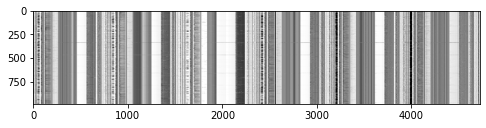

In [480]:
plt.imshow(tsf_u, cmap='binary')

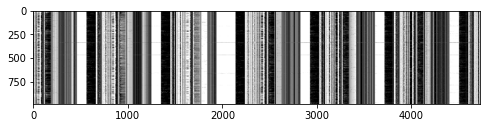

In [469]:
plt.imshow(tsf_u_hash_simple.values, cmap='binary')

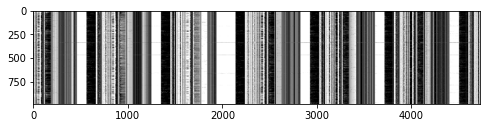

In [487]:
plt.imshow(tsf_u_hash_simple1.values, cmap='binary')

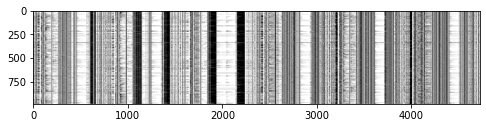

In [470]:
plt.imshow(tsf_u_hash.values, cmap='binary')

In [ ]:
plt.imshow(tsf_u_hash1.values, cmap='binary')

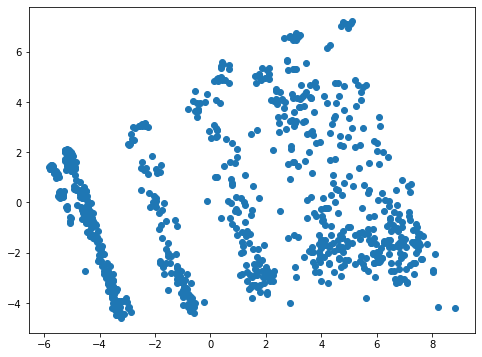

In [315]:
scaler = MinMaxScaler()
tsf_u = scaler.fit_transform(extracted_features)
vectors = PCA().fit_transform(tsf_u) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

In [316]:
vectors.shape

(984, 984)

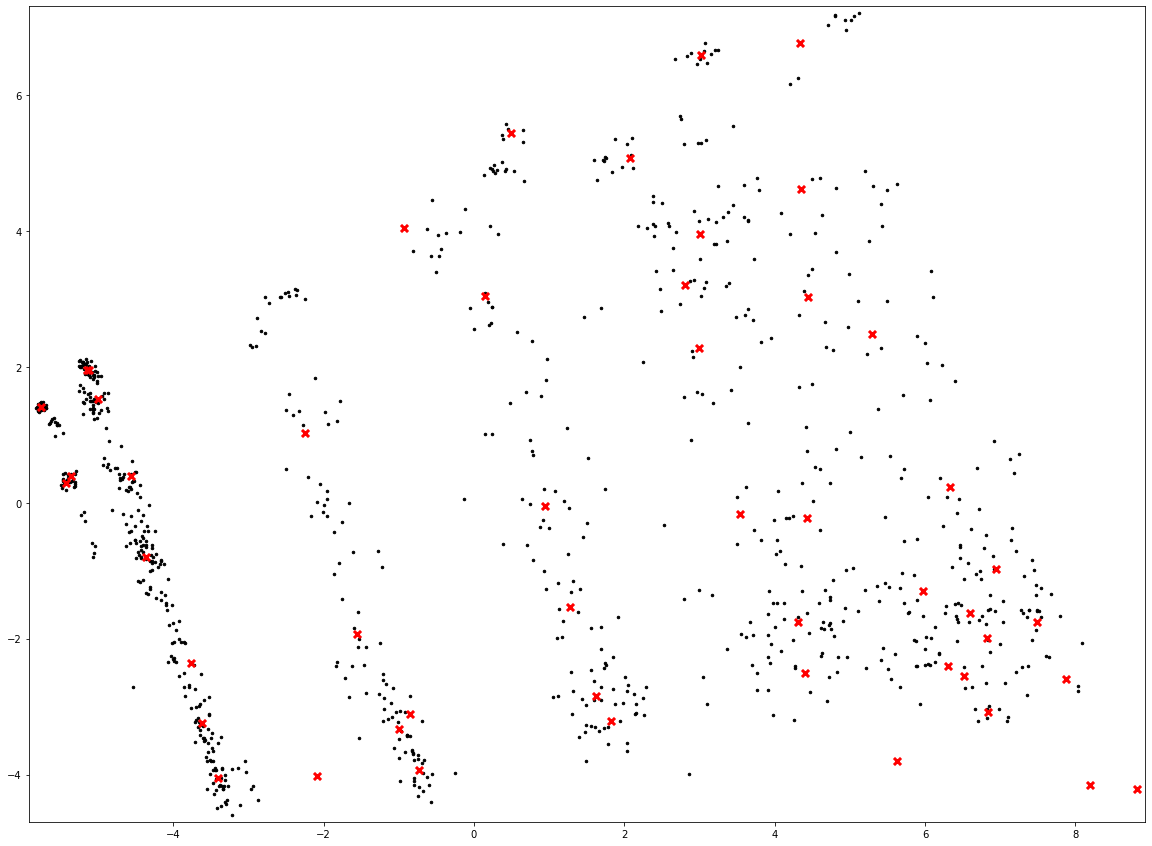

In [264]:
CLUSTERS = 50
estimator = KMeans(n_clusters=CLUSTERS,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (20, 15)

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
# plt.title('K-means clustering on the TSFresh Features (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.show()


In [265]:
df_user_TSF = pd.DataFrame(label_pred,extracted_features.index)
df_user_TSF = df_user_TSF.rename(columns={0:'cluster'})
df_user_TSF.T

127    190    325    383    477    498    533    580    622    636    \
cluster     25      8     39      1     25     25      4     42      5     38   

         ...  71278  71287  71291  71323  71331  71420  71478  71497  71509  \
cluster  ...     36      6     25      9     30     29      7     37     21   

         71534  
cluster     18  

[1 rows x 984 columns]

In [267]:
res_output = {'uU':{},'iI':{}}

for i,v in df_user_TSF.groupby('cluster').apply(lambda x: list([f'U-{i}' for i in x.index])).items():
  res_output['uU'][f'u-{i}'] = v

In [268]:
res_output_1 = {'Uu':{},'Ii':{}}

for i in df_user_TSF.index:
    res_output_1['Uu'][f'U-{i}'] = [f"u-{df_user_TSF.loc[i,'cluster']}"]

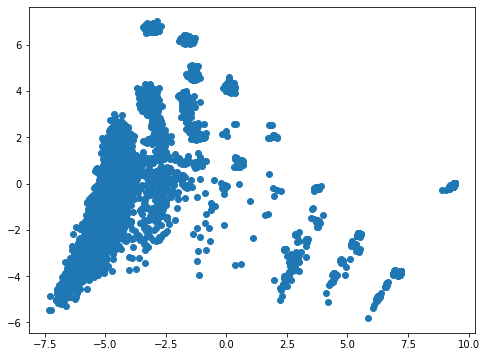

In [317]:
# TSFresh features for Movie
scaler = MinMaxScaler()
tsf_m = scaler.fit_transform(extracted_features_movie)
vectors = PCA().fit_transform(tsf_m) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

In [318]:
vectors.shape

(5798, 4722)

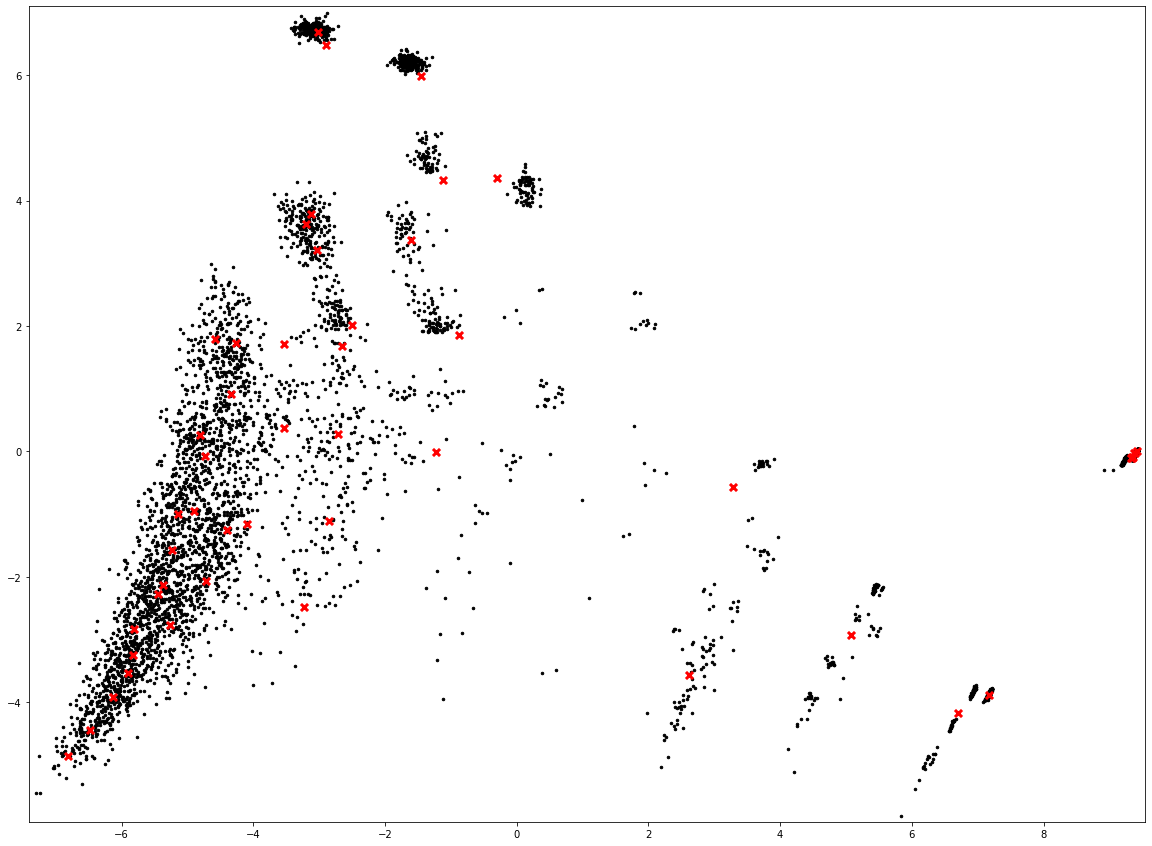

In [270]:
estimator = KMeans(n_clusters=CLUSTERS,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (20, 15)

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
# plt.title('K-means clustering on the TSFresh Features (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.show()


In [271]:
pd.Series(label_pred).value_counts()

9     263
3     237
43    234
11    216
27    202
18    191
40    186
21    169
37    167
8     165
26    158
14    154
31    153
13    147
47    141
38    140
46    135
16    135
30    133
2     120
20    119
23    118
5     113
25    111
6     109
41    106
45    103
10    100
1      98
32     97
34     96
42     95
29     92
44     91
24     89
22     87
7      81
12     77
36     66
39     66
15     65
49     65
48     57
28     55
35     51
33     43
4      37
17     35
0      18
19     12
dtype: int64

In [272]:
df_movie_TSF = pd.DataFrame(label_pred,extracted_features_movie.index)
df_movie_TSF = df_movie_TSF.rename(columns={0:'cluster'})
df_movie_TSF.T

1  10  1003  1005  1006  1007  1009  101  1010  1012  ...  974  976  \
cluster  42  38    43    41    22     0    24   23    13    20  ...   18    5   

         98  982  983  986  992  994  996  999  
cluster  47    0   47   14    3   21   30    3  

[1 rows x 5798 columns]

In [273]:
for i,v in df_movie_TSF.groupby('cluster').apply(lambda x: list([f'I-{n}' for n in x.index])).items():
  res_output['iI'][f'i-{i}'] = v
    
for i in df_movie_TSF.index:
    res_output_1['Ii'][f'I-{i}'] = [f"i-{df_movie_TSF.loc[i,'cluster']}"]

In [274]:
saveJson(res_output, f'taggingKMeans{CLUSTERS}TSFresh_uU_iI_Top1.json')    
saveJson(res_output_1, f'taggingKMeans{CLUSTERS}TSFresh_Uu_Ii_Top1.json')

## Only tagging data pca

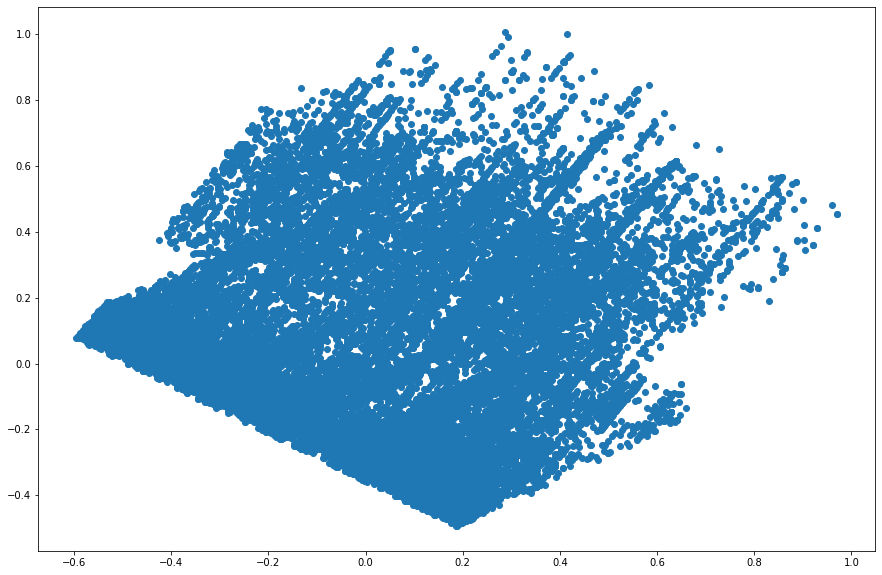

In [15]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,:3]
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(vectors[:,0],vectors[:,1])

## Tagging + original temporal data pca

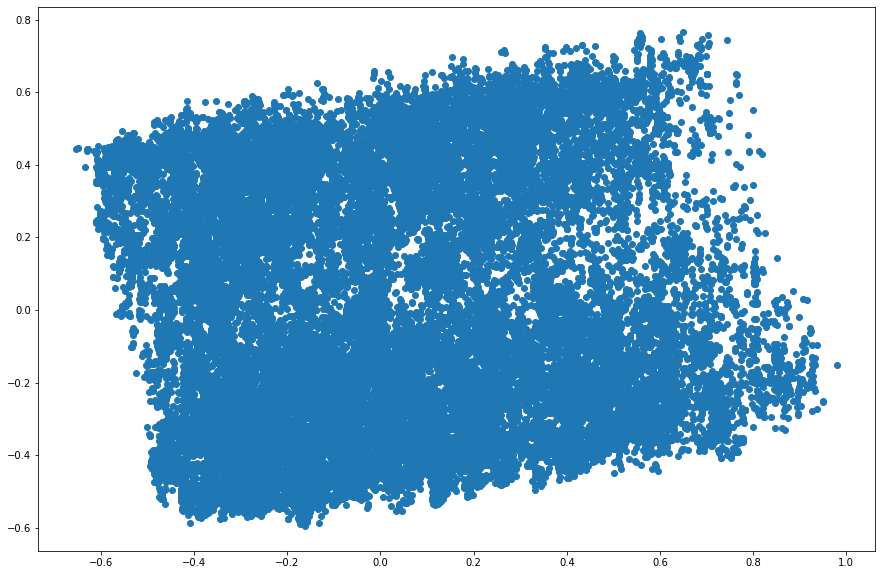

In [21]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,:9]
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (15, 10)
plt.scatter(vectors[:,0],vectors[:,1])

## Tagging + Manual temporal pca

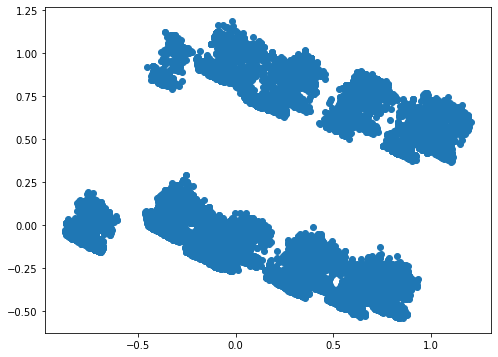

In [ ]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = pd.concat([df_selected.iloc[:,:3],df_selected.iloc[:,9:]],axis=1)
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

## Tagging + all temporal  pca

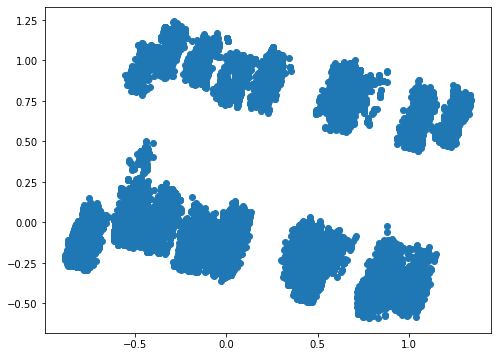

In [17]:
df_selected = df.filter(regex="[^time_stamp]")
cols = df_selected.columns
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
pca = PCA()
vectors = pca.fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

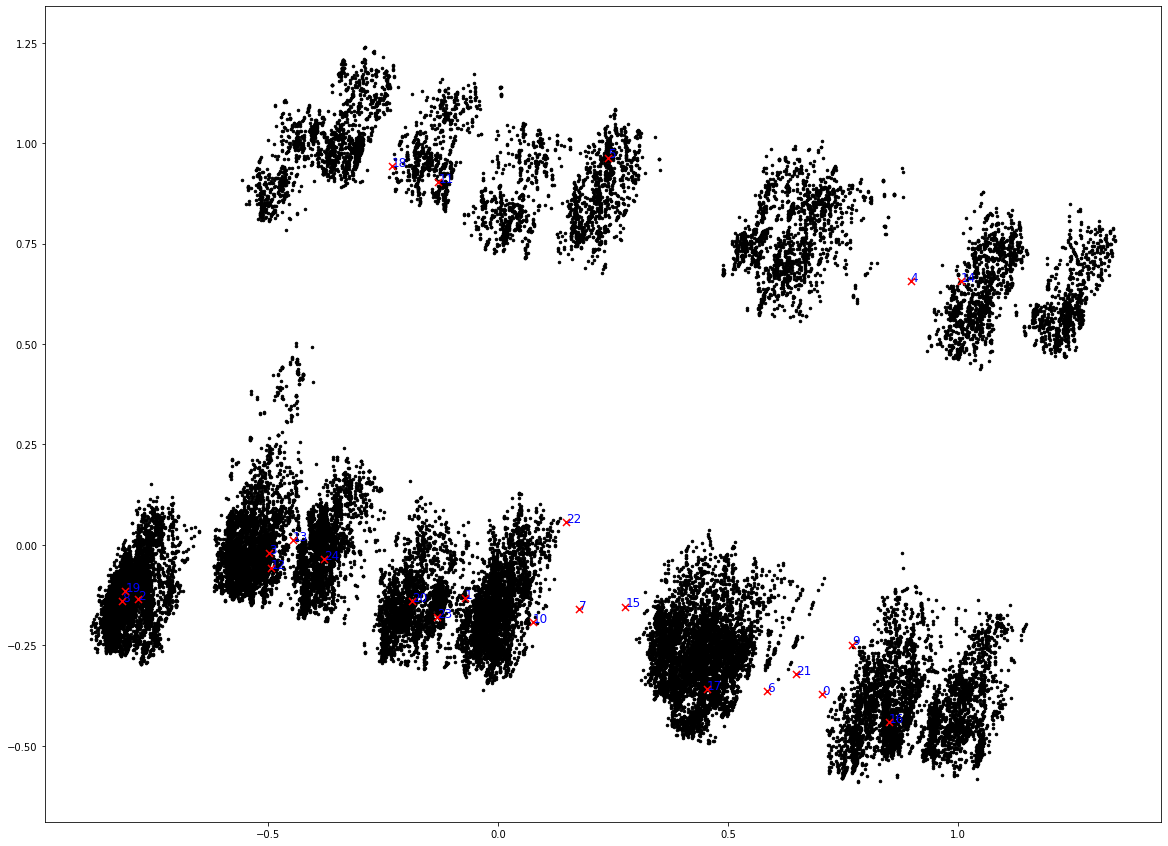

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和
x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (20, 15)

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
# plt.title('K-means clustering on the TSFresh Features (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [143]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley) # c = y 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, cols[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
            
def getdf_pca():
  # get the most important features on the PCs 
  n_pcs= pca.components_.shape[0] # 2

  # get the index of the most important feature on EACH component
  # LIST COMPREHENSION HERE
  most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

  initial_feature_names = cols
  # get the names
  most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

  # LIST COMPREHENSION HERE AGAIN
  dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

  # build the dataframe
  df_pca = pd.DataFrame(dic.items())
  
  return df_pca.T

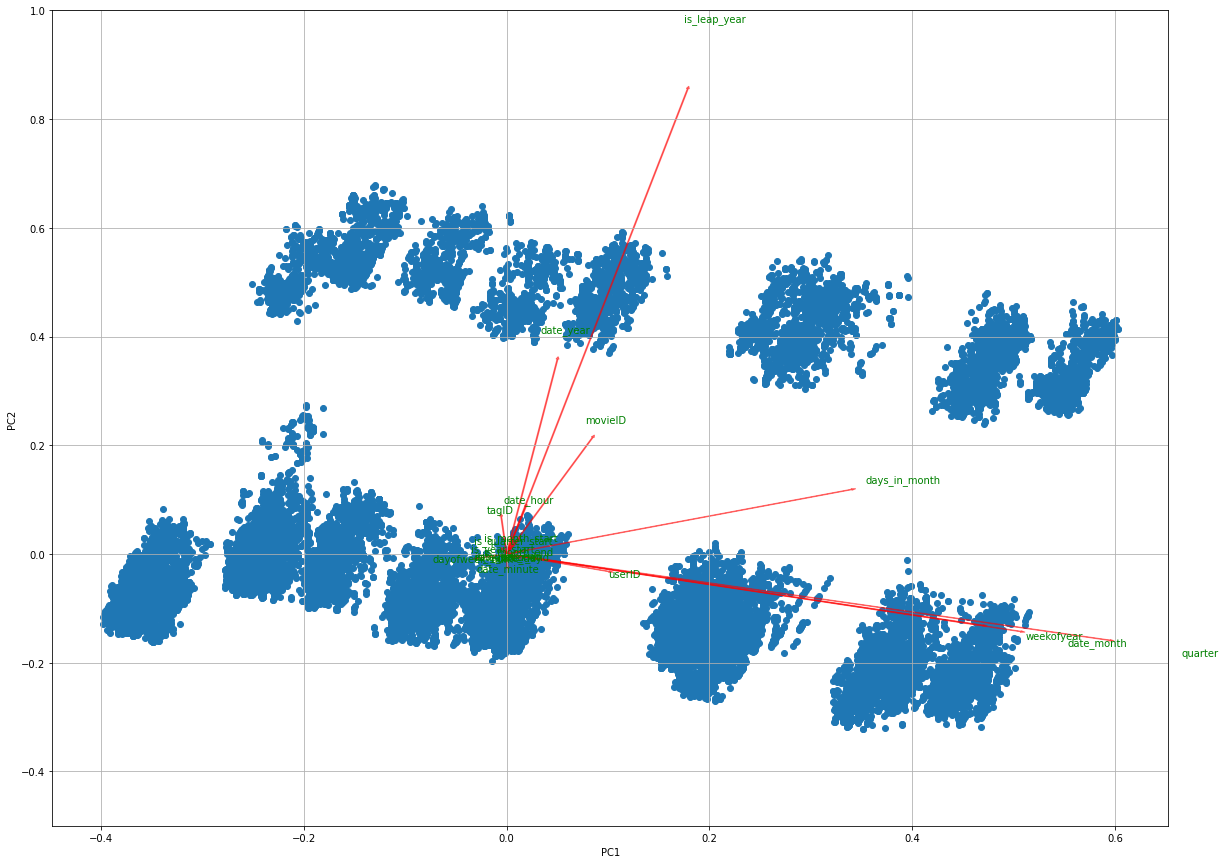

In [ ]:
# plt.xlim(-1,1)
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(vectors[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [ ]:
getdf_pca()

0                 1
0    PC0           quarter
1    PC1      is_leap_year
2    PC2         date_hour
3    PC3     dayofweek_num
4    PC4         date_hour
5    PC5       date_minute
6    PC6       date_second
7    PC7          date_day
8    PC8            userID
9    PC9             tagID
10  PC10           movieID
11  PC11    is_month_start
12  PC12      is_month_end
13  PC13         date_year
14  PC14  is_quarter_start
15  PC15    is_quarter_end
16  PC16           quarter
17  PC17     is_year_start
18  PC18    is_quarter_end
19  PC19       is_year_end

### Group by USER PCA

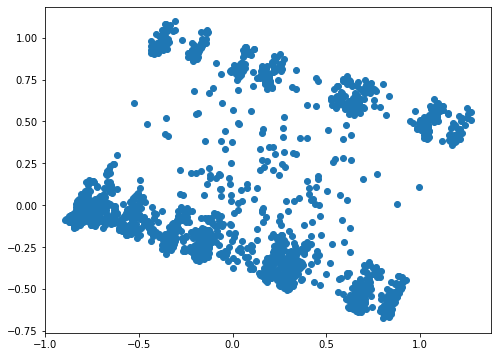

In [20]:
df_selected = df.filter(regex="[^time_stamp]") # all data
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
df_selected = pd.DataFrame(df_selected)
df_selected.columns = df.filter(regex="[^time_stamp]").columns
df_user = df_selected.groupby('userID').mean()
pca = PCA()
vectors = pca.fit_transform(df_user) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

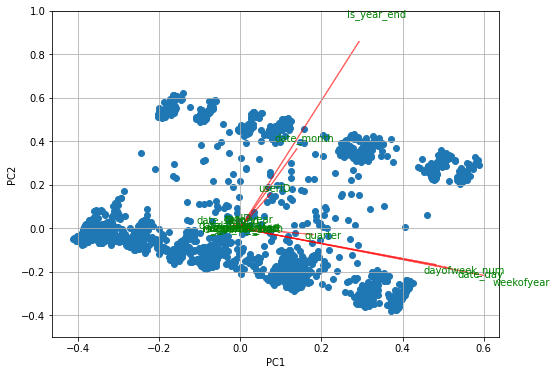

0                 1
0    PC0        weekofyear
1    PC1       is_year_end
2    PC2       date_second
3    PC3         date_year
4    PC4           quarter
5    PC5           quarter
6    PC6         date_hour
7    PC7            userID
8    PC8           movieID
9    PC9       date_minute
10  PC10    is_month_start
11  PC11     days_in_month
12  PC12        date_month
13  PC13      is_month_end
14  PC14  is_quarter_start
15  PC15        weekofyear
16  PC16     is_year_start
17  PC17    is_quarter_end
18  PC18     is_year_start

In [ ]:
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(vectors[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

getdf_pca()

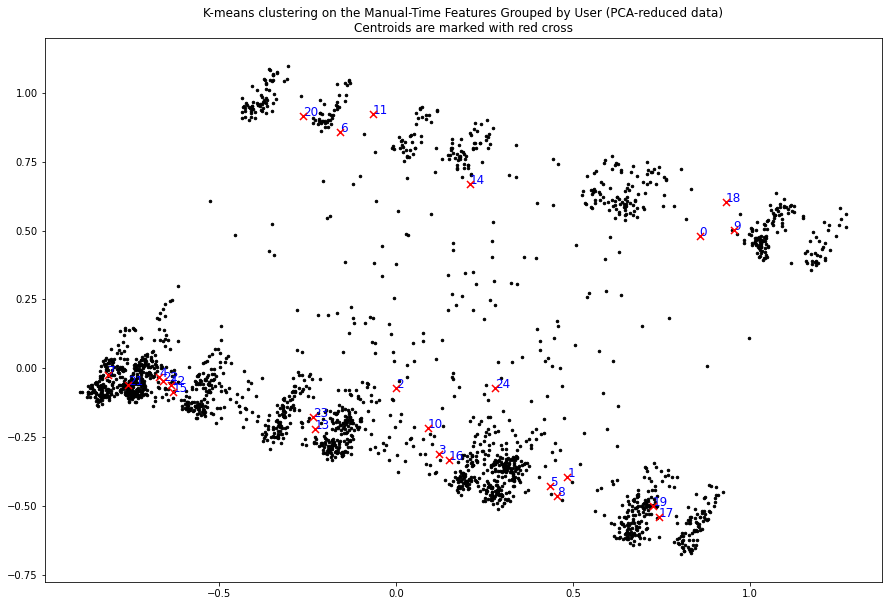

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (15, 10)


plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
plt.title('K-means clustering on the Manual-Time Features Grouped by User (PCA-reduced data)\n'
          'Centroids are marked with red cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

### Group by Item PCA

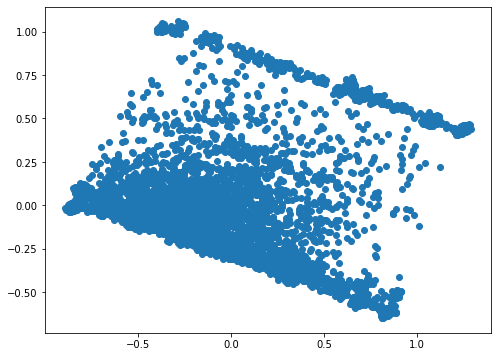

In [ ]:
df_selected = df.filter(regex="[^time_stamp]") # all data
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
df_selected = pd.DataFrame(df_selected)
df_selected.columns = df.filter(regex="[^time_stamp]").columns
df_item = df_selected.groupby('movieID').mean()
vectors = PCA(n_components=2).fit_transform(df_item) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

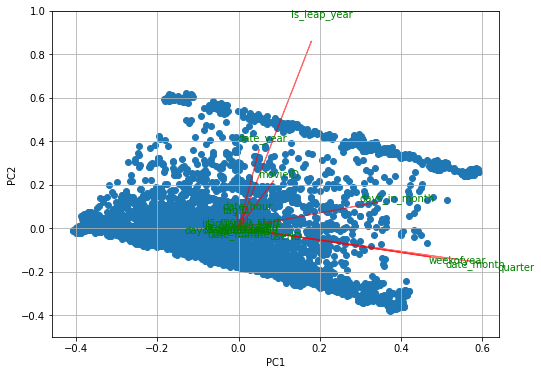

0                 1
0    PC0           quarter
1    PC1      is_leap_year
2    PC2         date_hour
3    PC3     dayofweek_num
4    PC4         date_hour
5    PC5       date_minute
6    PC6       date_second
7    PC7          date_day
8    PC8            userID
9    PC9             tagID
10  PC10           movieID
11  PC11    is_month_start
12  PC12      is_month_end
13  PC13         date_year
14  PC14  is_quarter_start
15  PC15    is_quarter_end
16  PC16           quarter
17  PC17     is_year_start
18  PC18    is_quarter_end
19  PC19       is_year_end

In [ ]:
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(vectors[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

getdf_pca()

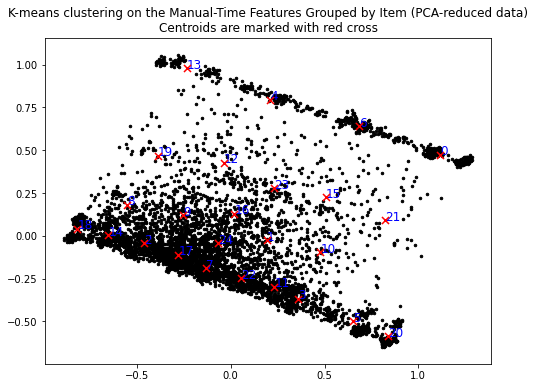

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
plt.title('K-means clustering on the Manual-Time Features Grouped by Item (PCA-reduced data)\n'
          'Centroids are marked with red cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

### Group by Tag PCA

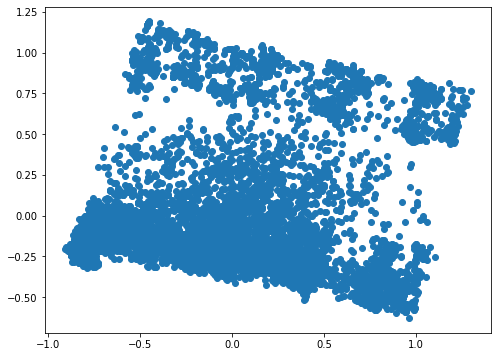

In [ ]:
df_selected = df.filter(regex="[^time_stamp]") # all data
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
df_selected = pd.DataFrame(df_selected)
df_selected.columns = df.filter(regex="[^time_stamp]").columns
df_tag = df_selected.groupby('tagID').mean()
vectors = PCA(n_components=2).fit_transform(df_tag) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

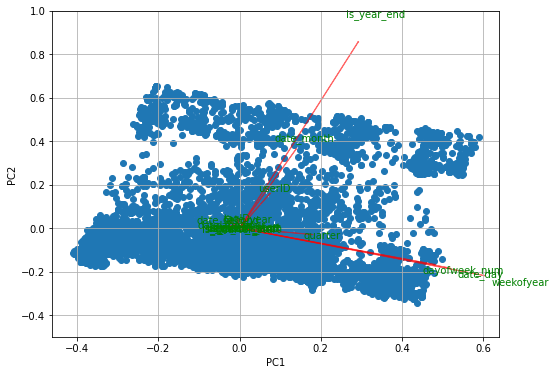

0                 1
0    PC0        weekofyear
1    PC1       is_year_end
2    PC2       date_second
3    PC3         date_year
4    PC4           quarter
5    PC5           quarter
6    PC6         date_hour
7    PC7            userID
8    PC8           movieID
9    PC9       date_minute
10  PC10    is_month_start
11  PC11     days_in_month
12  PC12        date_month
13  PC13      is_month_end
14  PC14  is_quarter_start
15  PC15        weekofyear
16  PC16     is_year_start
17  PC17    is_quarter_end
18  PC18     is_year_start

In [ ]:
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(vectors[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

getdf_pca()

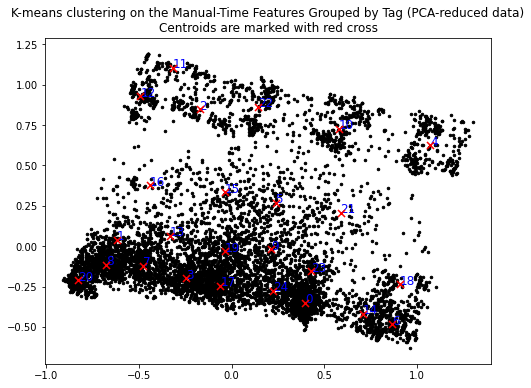

In [ ]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
plt.title('K-means clustering on the Manual-Time Features Grouped by Tag (PCA-reduced data)\n'
          'Centroids are marked with red cross')
for i in range(25):
    plt.text(centroids[i, 0], centroids[i, 1], i, color='blue',size='large')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# Graph


In [ ]:
# test
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
 
G = nx.Graph()
Matrix = np.array(
    [
        [0, 1, 1, 1, 1, 1, 0, 0],  # a
        [0, 0, 1, 0, 1, 0, 0, 0],  # b
        [0, 0, 0, 1, 0, 0, 0, 0],  # c
        [0, 0, 0, 0, 1, 0, 0, 0],  # d
        [0, 0, 0, 0, 0, 1, 0, 0],  # e
        [0, 0, 1, 0, 0, 0, 1, 1],  # f
        [0, 0, 0, 0, 0, 1, 0, 1],  # g
        [0, 0, 0, 0, 0, 1, 1, 0]  # h
    ]
)
pos = nx.layout.spring_layout(G)
for i in range(len(Matrix)):
    for j in range(len(Matrix)):
        G.add_edge(i, j)
 
nx.draw(G)
plt.show()

## use centroids of Tagging + all time-series data pca

In [ ]:
dis_l1 = (pow(centroids[:,0],2)+pow(centroids[:,1],2))
dis_l1

array([0.63241715, 0.02248993, 0.62930406, 0.2478305 , 1.23416511,
       0.98672805, 0.4745856 , 0.05654733, 0.68729706, 0.65283004,
       0.04274901, 0.83148844, 0.24738381, 0.19822052, 1.44291516,
       0.10012788, 0.91722114, 0.33598854, 0.94125638, 0.66908064,
       0.05475995, 0.52203415, 0.02484719, 0.04968762, 0.14452386])

In [ ]:
df_dis = pd.DataFrame(np.zeros([25,25]))

for i in range(0,25):
  for j in range(0,25):
    # df_dis.iloc[i, j] = pow((dis_l1[i]-dis_l1[j]),2) #l1
    df_dis.iloc[i, j] = pow((centroids[:,0][i]-centroids[:,0][j]),2) + pow((centroids[:,1][i]-centroids[:,1][j]),2)

In [ ]:
# Scaled
scaler = MinMaxScaler()
df_dis = scaler.fit_transform(df_dis)
df_dis = pd.DataFrame(df_dis)
df_dis.head()

0         1         2   ...        22        23        24
0  0.000000  0.369166  0.591543  ...  0.448504  0.368090  0.536075
1  0.253450  0.000000  0.131862  ...  0.075940  0.002965  0.043233
2  0.870731  0.282713  0.000000  ...  0.819554  0.212907  0.072073
3  0.602848  0.108678  0.024629  ...  0.383858  0.079961  0.005995
4  0.420732  0.874011  0.900632  ...  0.839171  0.880744  0.878246

[5 rows x 25 columns]

In [ ]:
df_dis.describe()

0          1          2   ...         22         23         24
count  25.000000  25.000000  25.000000  ...  25.000000  25.000000  25.000000
mean    0.397691   0.294786   0.323785  ...   0.442925   0.282879   0.287369
std     0.343303   0.289991   0.296101  ...   0.320593   0.290115   0.294433
min     0.000000   0.000000   0.000000  ...   0.000000   0.000000   0.000000
25%     0.088336   0.058072   0.045154  ...   0.137225   0.067023   0.043233
50%     0.326126   0.272236   0.239837  ...   0.383858   0.212907   0.134776
75%     0.602848   0.403996   0.542890  ...   0.758300   0.409092   0.473444
max     1.000000   1.000000   1.000000  ...   1.000000   1.000000   1.000000

[8 rows x 25 columns]

In [ ]:
df_dis.describe().loc['75%',:].mean()

0.5742124276703159

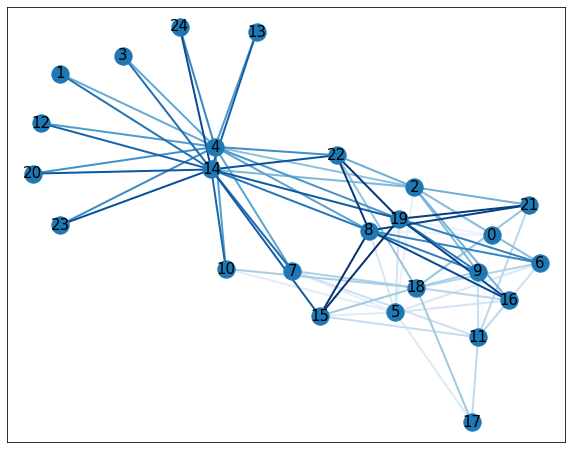

75


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
random.seed(0)        
np.random.seed(0)
minDis = 0.8
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

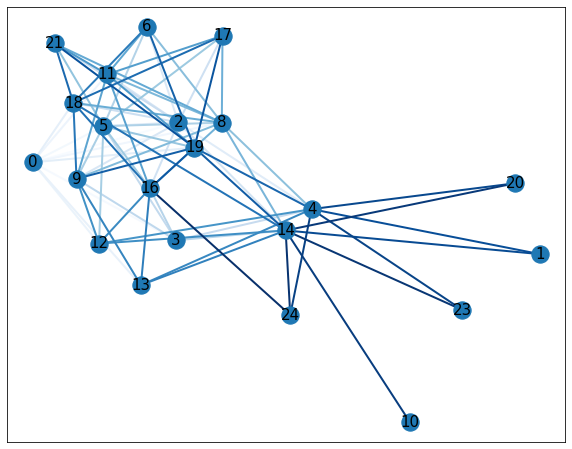

78


In [ ]:
#UnScaled
random.seed(0)        
np.random.seed(0)
minDis = 1.4612
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)
pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

## use Tagging+all tiem Group by User PCA
Scaled

In [ ]:
df_dis = pd.DataFrame(np.zeros([25,25]))

for i in range(0,25):
  for j in range(0,25):
    # df_dis.iloc[i, j] = pow((dis_l1[i]-dis_l1[j]),2) #l1
    df_dis.iloc[i, j] = pow((centroids[:,0][i]-centroids[:,0][j]),2) + pow((centroids[:,1][i]-centroids[:,1][j]),2)

In [ ]:
scaler = MinMaxScaler()
df_dis = scaler.fit_transform(df_dis)
df_dis = pd.DataFrame(df_dis)
df_dis.head()

0         1         2   ...        22        23        24
0  0.000000  0.399617  0.786301  ...  0.873321  0.825601  0.505580
1  0.296886  0.000000  0.255277  ...  0.484178  0.286312  0.115493
2  0.340303  0.148711  0.000000  ...  0.147727  0.033517  0.061387
3  0.383249  0.061532  0.053725  ...  0.229395  0.072760  0.065221
4  0.849788  0.644213  0.341341  ...  0.000095  0.107261  0.713534

[5 rows x 25 columns]

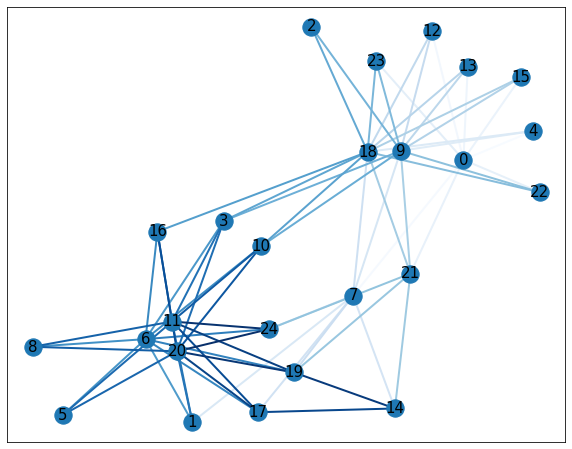

68


In [ ]:
random.seed(0)        
np.random.seed(0)
minDis = 0.8
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

## use Tagging+all tiem Group by Item PCA
Scaled

In [ ]:
df_dis = pd.DataFrame(np.zeros([25,25]))

for i in range(0,25):
  for j in range(0,25):
    # df_dis.iloc[i, j] = pow((dis_l1[i]-dis_l1[j]),2) #l1
    df_dis.iloc[i, j] = pow((centroids[:,0][i]-centroids[:,0][j]),2) + pow((centroids[:,1][i]-centroids[:,1][j]),2)

In [ ]:
scaler = MinMaxScaler()
df_dis = scaler.fit_transform(df_dis)
df_dis = pd.DataFrame(df_dis)
df_dis.head()

0         1         2   ...        22        23        24
0  0.000000  0.924578  1.000000  ...  1.000000  0.718936  1.000000
1  0.279639  0.000000  0.155962  ...  0.041748  0.079629  0.041179
2  0.702159  0.362076  0.000000  ...  0.189088  0.503574  0.093166
3  0.326603  0.122598  0.282002  ...  0.064285  0.376322  0.172620
4  0.235268  0.565978  0.419723  ...  0.677173  0.234586  0.467601

[5 rows x 25 columns]

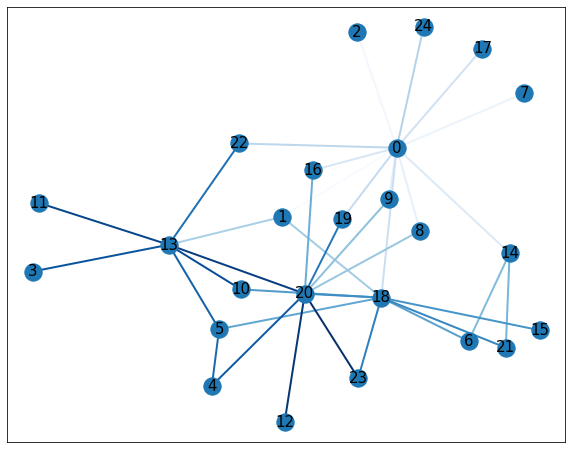

37


In [ ]:
random.seed(0)        
np.random.seed(0)
minDis = 0.8
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

## use Tagging+all tiem Group by Tag PCA
Scaled

In [ ]:
df_dis = pd.DataFrame(np.zeros([25,25]))

for i in range(0,25):
  for j in range(0,25):
    # df_dis.iloc[i, j] = pow((dis_l1[i]-dis_l1[j]),2) #l1
    df_dis.iloc[i, j] = pow((centroids[:,0][i]-centroids[:,0][j]),2) + pow((centroids[:,1][i]-centroids[:,1][j]),2)

In [ ]:
scaler = MinMaxScaler()
df_dis = scaler.fit_transform(df_dis)
df_dis = pd.DataFrame(df_dis)
df_dis.head()

0         1         2   ...        22        23        24
0  0.000000  0.370779  0.617304  ...  0.657869  0.018191  0.016073
1  0.451024  0.000000  0.298627  ...  0.538577  0.529886  0.368502
2  0.668598  0.265895  0.000000  ...  0.042721  0.636565  0.644583
3  0.165015  0.061851  0.384977  ...  0.545583  0.211616  0.102091
4  0.534449  1.000000  0.559955  ...  0.392759  0.475631  0.694747

[5 rows x 25 columns]

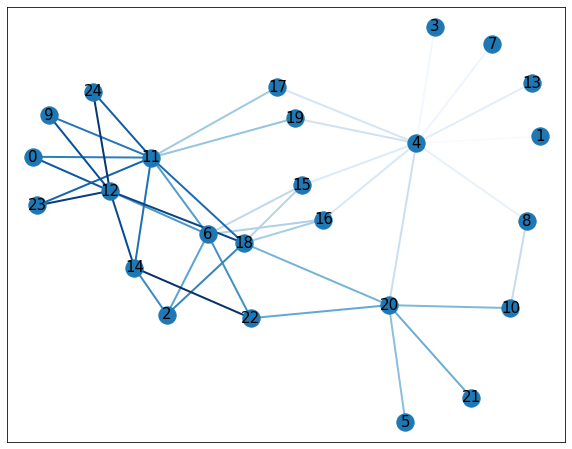

41


In [ ]:
random.seed(0)        
np.random.seed(0)
minDis = 0.8
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)